https://bit.ly/RSML-1-basic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Датасет

https://drive.google.com/file/d/1m0rwReR09achL0xTM6QPoN4tykz5bOMx

In [ ]:
!wget 'https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx' -O MovieLens.zip

--2024-01-18 17:18:33--  https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.102, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx [following]
--2024-01-18 17:18:33--  https://drive.usercontent.google.com/download?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 847695 (828K) [application/octet-stream]
Saving to: ‘MovieLens.zip’

MovieLens.zip       100%[===================>] 827.83K  --.-KB/s    in 0.1s    

2024-01-18 17:18:34 (6.65 MB/s) - ‘Mo

In [ ]:
!unzip MovieLens.zip

Archive:  MovieLens.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [ ]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
# соединим таблицу с рейтингами и названиями фильмов
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

In [ ]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


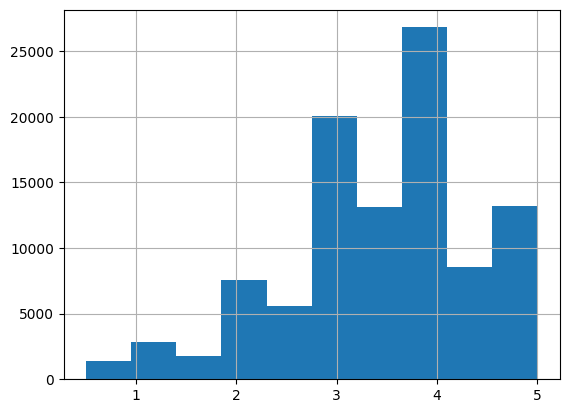

In [ ]:
# посмотрим на гистограмму распределения оценок
joined_ratings.rating.hist();

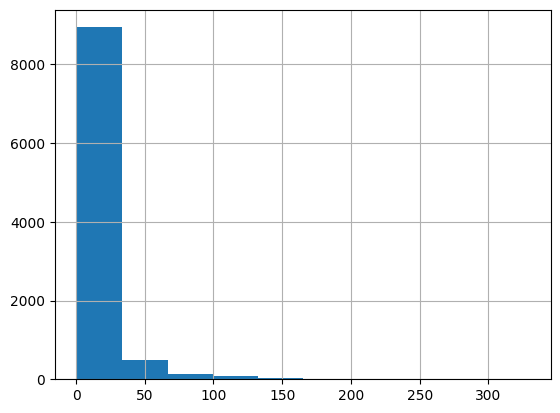

In [ ]:
# гистограмма по количеству оценок на фильм
joined_ratings.groupby('title').rating.count().hist();

Какие фильмы будут интересными среднему пользователю

In [ ]:
# достанем топ фильмов по оценкам
top_films = joined_ratings.groupby('title')[['rating']].mean().sort_values('rating', ascending=False)
top_films.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [ ]:
# возьмем только фильмы с наивысшей средней оценкой в 5.0
films_with_highest_marks = top_films.iloc[np.where(top_films.rating == 5.0)].index
films_with_highest_marks

Index(['Gena the Crocodile (1969)', 'True Stories (1986)',
       'Cosmic Scrat-tastrophe (2015)', 'Love and Pigeons (1985)',
       'Red Sorghum (Hong gao liang) (1987)',
       'Thin Line Between Love and Hate, A (1996)', 'Lesson Faust (1994)',
       'Eva (2011)', 'Who Killed Chea Vichea? (2010)', 'Siam Sunset (1999)',
       ...
       'George Carlin: Back in Town (1996)', '9/11 (2002)',
       'Only Lovers Left Alive (2013)', 'Obsession (1965)', 'Oscar (1967)',
       'Tom Segura: Completely Normal (2014)',
       'George Carlin: It's Bad for Ya! (2008)',
       'Garden of Words, The (Koto no ha no niwa) (2013)',
       'Go for Zucker! (Alles auf Zucker!) (2004)',
       'Open Hearts (Elsker dig for evigt) (2002)'],
      dtype='object', name='title', length=296)

In [ ]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = joined_ratings['title'].value_counts()
title_num_ratings

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: title, Length: 9719, dtype: int64

In [ ]:
# выведем топ фильмов со средней оценкой в 5.0 по количеству отзывов и увидим, что рейтинг получается не самый удачный
title_num_ratings[films_with_highest_marks].sort_values()

title
Gena the Crocodile (1969)                                                            1
Hunting Elephants (2013)                                                             1
What Happened Was... (1994)                                                          1
Crossing Delancey (1988)                                                             1
Cruel Romance, A (Zhestokij Romans) (1984)                                           1
                                                                                    ..
Heidi Fleiss: Hollywood Madam (1995)                                                 2
Lesson Faust (1994)                                                                  2
Lamerica (1994)                                                                      2
Belle époque (1992)                                                                  2
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976)    2
Name: title, Length: 296, dtype: int6

# Улучшение метрики

### Попробуем теперь сортировать фильмы по следующей метрике: средняя оценка фильма, умноженная на нормированное количество рейтингов

In [ ]:
# достанем простые статистики по количеству рейтингов
min_num_ratings = np.min(title_num_ratings)
max_num_ratings = np.max(title_num_ratings)
mean_num_ratings = np.mean(title_num_ratings)
median_num_ratings = np.median(title_num_ratings)

In [ ]:
print(f"Minimum number of ratings:\t{min_num_ratings}")
print(f"Maximum number of ratings:\t{max_num_ratings}")
print(f"Average number of ratings:\t{mean_num_ratings:.2f}")
print(f"Median number of ratings:\t{median_num_ratings}")

Minimum number of ratings:	1
Maximum number of ratings:	329
Average number of ratings:	10.38
Median number of ratings:	3.0


In [ ]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = joined_ratings.groupby('title')['rating'].mean()
title_mean_rating

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [ ]:
norm_coef = max_num_ratings - min_num_ratings
norm_coef

328

In [ ]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.index:
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - min_num_ratings) / norm_coef)
    )

film_with_our_mark[:10]

[('Forrest Gump (1994)', 4.164133738601824),
 ('Shawshank Redemption, The (1994)', 4.266984688774333),
 ('Pulp Fiction (1994)', 3.9155577182807666),
 ('Silence of the Lambs, The (1991)', 3.526947285601888),
 ('Matrix, The (1999)', 3.5405718108440083),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.2249052570206973),
 ('Jurassic Park (1993)', 2.7096036585365852),
 ('Braveheart (1995)', 2.900818153751158),
 ('Terminator 2: Judgment Day (1991)', 2.6997835910278747),
 ("Schindler's List (1993)", 2.8209603658536584)]

In [ ]:
sorted_film_with_our_mark = list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))
sorted_film_with_our_mark[:5]

[('Shawshank Redemption, The (1994)', 4.266984688774333),
 ('Forrest Gump (1994)', 4.164133738601824),
 ('Pulp Fiction (1994)', 3.9155577182807666),
 ('Matrix, The (1999)', 3.5405718108440083),
 ('Silence of the Lambs, The (1991)', 3.526947285601888)]

In [ ]:
# выводим топ 20 и получилось уже очень неплохо
LIMIT = 20

for film, rate in sorted_film_with_our_mark[:LIMIT]:
    print(f"{film:<80}:\t{rate:.3f}")

Shawshank Redemption, The (1994)                                                :	4.267
Forrest Gump (1994)                                                             :	4.164
Pulp Fiction (1994)                                                             :	3.916
Matrix, The (1999)                                                              :	3.541
Silence of the Lambs, The (1991)                                                :	3.527
Star Wars: Episode IV - A New Hope (1977)                                       :	3.225
Braveheart (1995)                                                               :	2.901
Fight Club (1999)                                                               :	2.827
Schindler's List (1993)                                                         :	2.821
Jurassic Park (1993)                                                            :	2.710
Terminator 2: Judgment Day (1991)                                               :	2.700
Star Wars: Episode V - The Empir

### Появилась гипотеза использовать теги в ранжировании фильмов, решили считать не только количество отзывов, а ещё и количество проставленных тегов на фильм

In [ ]:
# соединим с таблицей с проставленными тегами по фильмам
joined_with_tags = movies.join(tags.set_index('movieId'), on='movieId')

In [ ]:
joined_with_tags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
1,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1.528844e+09
1,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1.528844e+09


In [ ]:
# достанем по каждому фильму количество рейтингов
title_num_actions = joined_with_tags['title'].value_counts()
title_num_actions

Pulp Fiction (1994)                                               181
Fight Club (1999)                                                  54
2001: A Space Odyssey (1968)                                       41
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     35
Eternal Sunshine of the Spotless Mind (2004)                       34
                                                                 ... 
Family Business (1989)                                              1
Farewell to the King (1989)                                         1
Fat Man and Little Boy (1989)                                       1
Gleaming the Cube (1989)                                            1
Andrew Dice Clay: Dice Rules (1991)                                 1
Name: title, Length: 9737, dtype: int64

In [ ]:
min_num_actions = np.min(title_num_actions)
max_num_actions = np.max(title_num_actions)
mean_num_actions = np.mean(title_num_actions)
median_num_actions = np.median(title_num_actions)

In [ ]:
print(f"Minimun number of actions:\t{min_num_actions}")
print(f"Maximum number of actions:\t{max_num_actions}")
print(f"Average number of actions:\t{mean_num_actions:.2f}" )
print(f"Median number of actions:\t{median_num_actions}")

Minimun number of actions:	1
Maximum number of actions:	181
Average number of actions:	1.22
Median number of actions:	1.0


In [ ]:
film_with_new_mark = []

for f in title_num_actions.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    try:
        film_with_new_mark.append(
            (f, title_mean_rating[f] * (title_num_actions[f] - min_num_actions) / (max_num_actions - min_num_actions))
        )
    except:
        pass

film_with_new_mark[:10]

[('Pulp Fiction (1994)', 4.197068403908795),
 ('Fight Club (1999)', 1.2581422018348625),
 ('2001: A Space Odyssey (1968)', 0.8654434250764526),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  0.7591060985797827),
 ('Eternal Sunshine of the Spotless Mind (2004)', 0.7627226463104326),
 ('Big Lebowski, The (1998)', 0.6758909853249476),
 ('Donnie Darko (2001)', 0.6193679918450561),
 ('Inception (2010)', 0.5647824397824398),
 ('Star Wars: Episode IV - A New Hope (1977)', 0.5876494023904382),
 ('Suicide Squad (2016)', 0.2916666666666667)]

In [ ]:
sorted_film_with_new_mark = list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))
sorted_film_with_new_mark[:5]

[('Pulp Fiction (1994)', 4.197068403908795),
 ('Fight Club (1999)', 1.2581422018348625),
 ('2001: A Space Odyssey (1968)', 0.8654434250764526),
 ('Eternal Sunshine of the Spotless Mind (2004)', 0.7627226463104326),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  0.7591060985797827)]

In [ ]:
# выводим топ 20 и получилось уже очень неплохо
LIMIT = 20

for film, rate in sorted_film_with_new_mark[:LIMIT]:
    print(f"{film:<80}:\t{rate:.3f}")

Pulp Fiction (1994)                                                             :	4.197
Fight Club (1999)                                                               :	1.258
2001: A Space Odyssey (1968)                                                    :	0.865
Eternal Sunshine of the Spotless Mind (2004)                                    :	0.763
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                  :	0.759
Big Lebowski, The (1998)                                                        :	0.676
Donnie Darko (2001)                                                             :	0.619
Star Wars: Episode IV - A New Hope (1977)                                       :	0.588
Inception (2010)                                                                :	0.565
In the Mood For Love (Fa yeung nin wa) (2000)                                   :	0.398
Pi (1998)                                                                       :	0.342
Avatar (2009)                   